In [3]:
pip install tensorflow-cpu

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split


In [5]:
dataset_dir = '/home/mllab16/Desktop/MVTec AD kaggle'  

In [6]:
categories = ['bottle', 'cable', 'capsule', 'carpet', 'grid', 'hazelnut', 'leather', 'metal_nut', 
              'pill', 'screw', 'tile', 'toothbrush', 'transistor', 'wood']

In [11]:
def load_data(category, dataset_dir):
    category_dir = os.path.join(dataset_dir, category)
    images = []
    labels = []
    normal_images = os.path.join(category_dir, 'train', 'good')  # Normal images
    for filename in os.listdir(normal_images):
        img = cv2.imread(os.path.join(normal_images, filename))
        img = cv2.resize(img, (128, 128))  # Resize to 128x128 for consistency
        images.append(img)
        labels.append(0)  # Normal (label 0)
        
    # Load anomalous images (abnormal examples)
    abnormal_images = os.path.join(category_dir, 'test', 'broken_large')
    for filename in os.listdir(abnormal_images):
        img = cv2.imread(os.path.join(abnormal_images, filename))
        img = cv2.resize(img, (128, 128))
        images.append(img)
        labels.append(1)  # Anomalous (label 1)
    
    images = np.array(images, dtype=np.float32) / 255.0  # Normalize the images
    labels = np.array(labels)
    return images, labels

In [12]:
# Load data for a specific category (e.g., 'bottle')
category = 'bottle'
X, y = load_data(category, dataset_dir)

In [14]:
# Step 4: Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Step 5: Build the Convolutional Autoencoder model
def build_autoencoder():
    input_img = layers.Input(shape=(128, 128, 3))
    
    # Encoder
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    # Decoder
    x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2DTranspose(3, (3, 3), activation='sigmoid', padding='same')(x)
    
    autoencoder = models.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    return autoencoder

autoencoder = build_autoencoder()
autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856 

In [16]:
# Step 6: Train the Autoencoder
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, validation_data=(X_test, X_test))

Epoch 1/10


2024-11-08 11:14:54.282566: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-11-08 11:14:54.690847: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-11-08 11:14:54.795720: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


1/6 [====>.........................] - ETA: 11s - loss: 0.1311

2024-11-08 11:14:55.207064: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2024-11-08 11:14:55.295599: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


6/6 [==============================] - 6s 648ms/step - loss: 0.1157 - val_loss: 0.0861
Epoch 2/10
6/6 [==============================] - 4s 615ms/step - loss: 0.0686 - val_loss: 0.0527
Epoch 3/10
6/6 [==============================] - 4s 590ms/step - loss: 0.0426 - val_loss: 0.0705
Epoch 4/10
6/6 [==============================] - 3s 585ms/step - loss: 0.0450 - val_loss: 0.0226
Epoch 5/10
6/6 [==============================] - 4s 613ms/step - loss: 0.0259 - val_loss: 0.0259
Epoch 6/10
6/6 [==============================] - 4s 595ms/step - loss: 0.0204 - val_loss: 0.0166
Epoch 7/10
6/6 [==============================] - 4s 596ms/step - loss: 0.0158 - val_loss: 0.0125
Epoch 8/10
6/6 [==============================] - 3s 585ms/step - loss: 0.0121 - val_loss: 0.0105
Epoch 9/10
6/6 [==============================] - 4s 587ms/step - loss: 0.0094 - val_loss: 0.0081
Epoch 10/10
6/6 [==============================] - 3s 575ms/step - loss: 0.0073 - val_loss: 0.0061


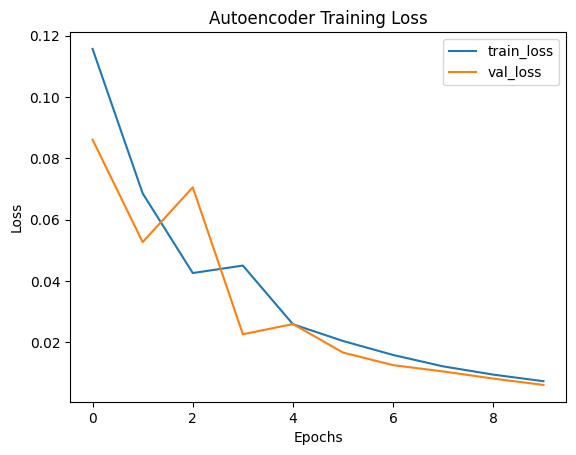

In [17]:
# Step 7: Visualize Training Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Autoencoder Training Loss')
plt.show()

In [18]:
# Step 8: Anomaly Detection
# Get the reconstruction error for both normal and anomalous images
X_pred = autoencoder.predict(X_test)


2/2 [==============================] - 0s 86ms/step


In [19]:
# Calculate reconstruction error (Mean Squared Error between input and output)
reconstruction_error = np.mean(np.square(X_test - X_pred), axis=(1, 2, 3))

In [29]:
# Set a threshold for anomaly detection (based on your dataset and experiment)
threshold = np.percentile(reconstruction_error, 75)  # Top 5% errors considered anomalous

In [30]:
# Step 9: Visualize Anomalies
def plot_anomalies(X_test, y_test, reconstruction_error, threshold):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()

    for i in range(10):
        ax = axes[i]
        img = X_test[i]
        ax.imshow(img)
        ax.set_title(f"Anomaly: {y_test[i]}\nError: {reconstruction_error[i]:.3f}")
        ax.axis('off')
        
        if reconstruction_error[i] > threshold:
            ax.set_title(f"Anomaly (Error: {reconstruction_error[i]:.3f})", color='red')
    
    plt.show()


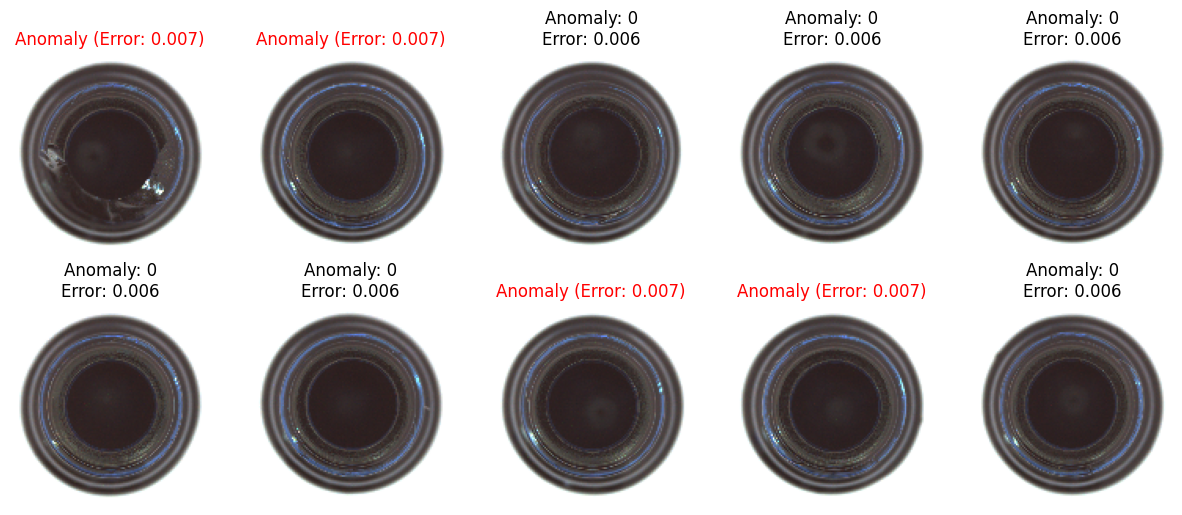

In [31]:
# Visualize the results
plot_anomalies(X_test, y_test, reconstruction_error, threshold)


In [23]:
# Step 8: Calculate Pixel-wise Reconstruction Error
# Get the reconstruction from the autoencoder
X_pred = autoencoder.predict(X_test)


2/2 [==============================] - 0s 85ms/step


In [24]:
# Calculate pixel-wise reconstruction error (absolute difference)
pixel_reconstruction_error = np.abs(X_test - X_pred)

In [25]:
# We can aggregate the error across all pixels in an image to get an overall error per image
# Sum the pixel errors across all channels (RGB)
pixel_reconstruction_error_sum = np.sum(pixel_reconstruction_error, axis=(1, 2, 3))


In [26]:
# Step 9: Set a threshold for anomaly detection
# We can use a percentile (e.g., 95th percentile) to define anomalies
threshold = np.percentile(pixel_reconstruction_error_sum, 95)  # Top 5% as anomalies


In [27]:
# Step 10: Visualize the pixel-wise reconstruction error
def plot_pixel_reconstruction_error(X_test, X_pred, pixel_reconstruction_error_sum, threshold):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    axes = axes.ravel()

    for i in range(10):
        ax = axes[i]
        img = X_test[i]
        recon_img = X_pred[i]
        error_map = pixel_reconstruction_error[i]  # This is the per-pixel error map
        
        ax.imshow(img)
        ax.set_title(f"Anomaly: {y_test[i]}\nError: {pixel_reconstruction_error_sum[i]:.3f}")
        ax.axis('off')

        # Highlight anomalies with high reconstruction error
        if pixel_reconstruction_error_sum[i] > threshold:
            ax.set_title(f"Anomaly (Error: {pixel_reconstruction_error_sum[i]:.3f})", color='red')
            
        # Optionally, show a reconstruction error map (heatmap for pixel-level error)
        plt.figure(figsize=(5, 5))
        plt.imshow(error_map.sum(axis=-1), cmap='hot')  # Sum across RGB channels to get a single error map
        plt.title(f"Pixel-wise Error Map - Image {i}")
        plt.colorbar()
        plt.show()


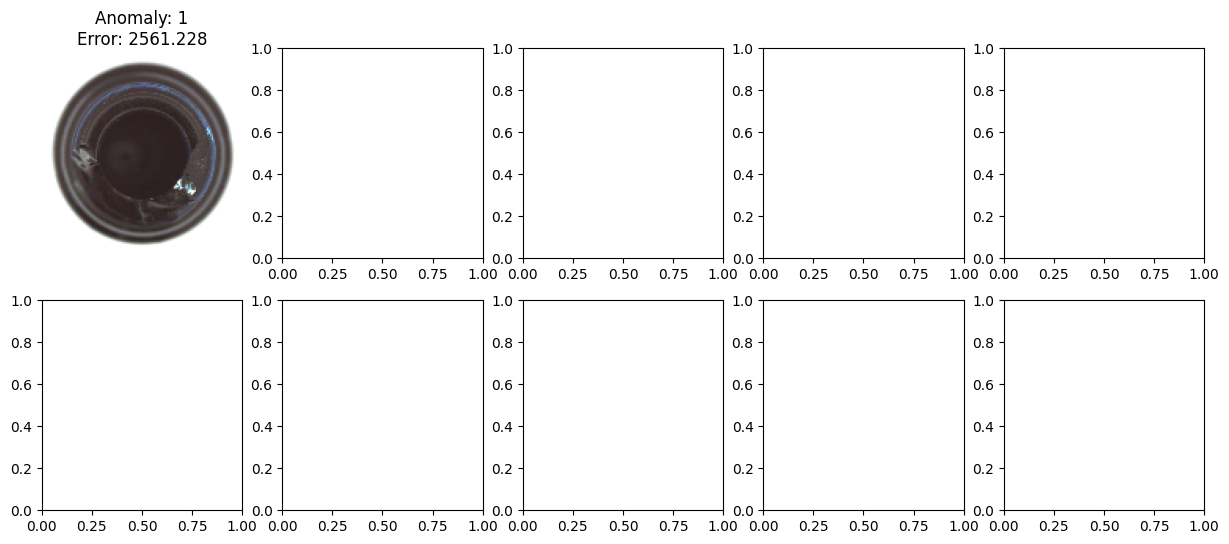

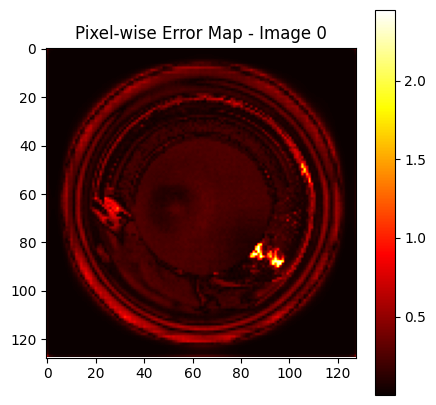

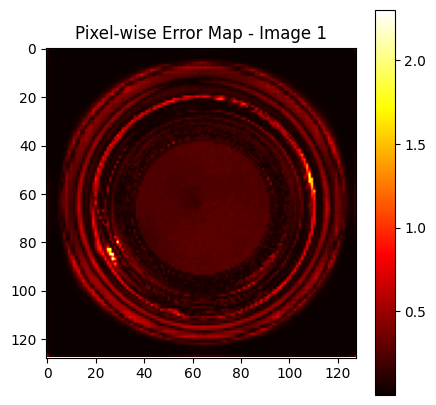

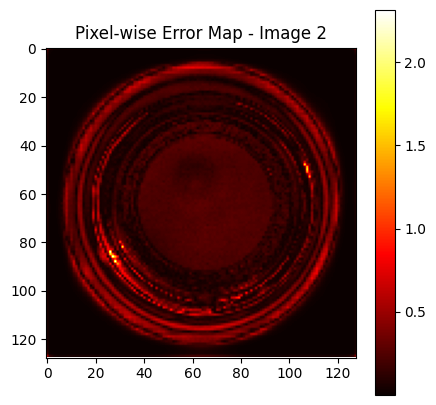

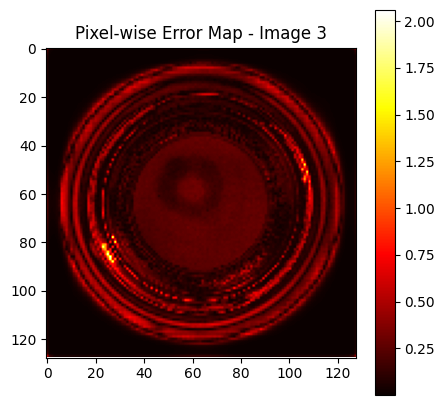

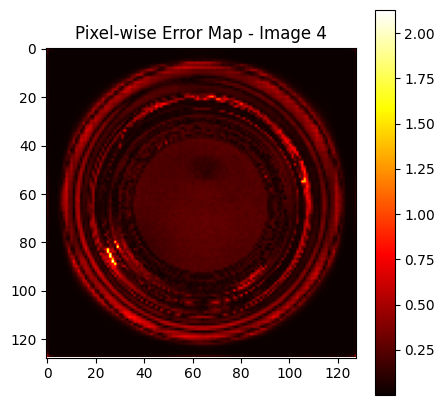

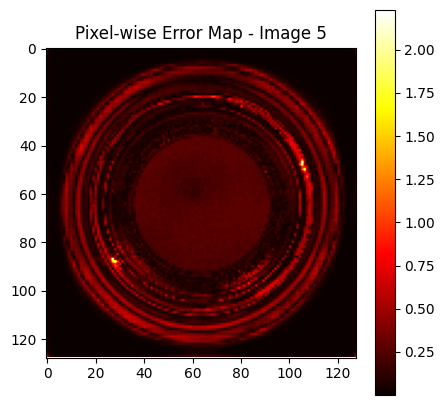

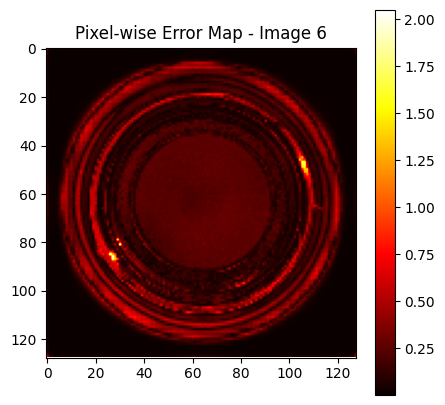

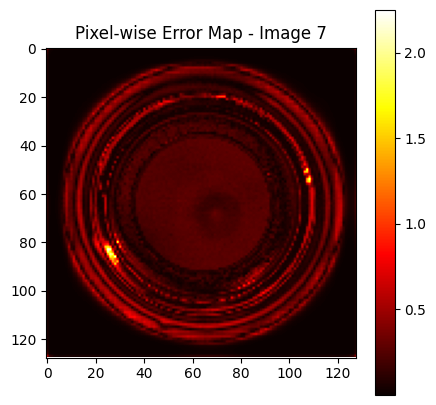

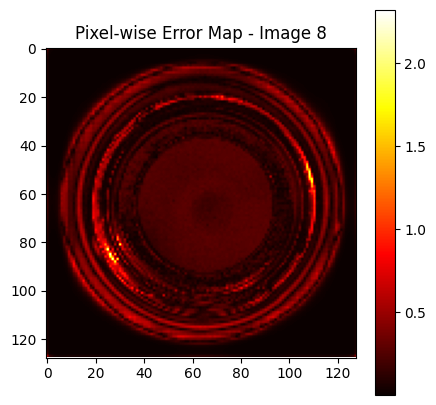

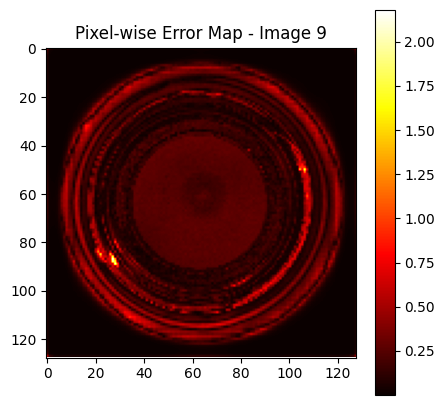

In [28]:
# Visualize the results
plot_pixel_reconstruction_error(X_test, X_pred, pixel_reconstruction_error_sum, threshold)